# Basics with Perceptron (P)

* Find this notebook at `EpyNN/nnlive/dummy_boolean/train.ipynb`.
* Regular python code at `EpyNN/nnlive/dummy_boolean/train.py`.

In this notebook we will review:

* Handling Boolean data.
* Design and train a simple perceptron using EpyNN objects.
* Basics and general concepts relevant to the context.

Please see the following if you get lost:

* [Neural Network - Model](../../EpyNN_Model.html)
* [Architecture layers - Model](../../Layer_Model.html)
* [Data - Model](../../Data_Model.html)
* [Data Embedding (Input)](../../Embedding.html)
* [Fully Connected (Dense)](../../Dense.html)

## Import, configure and retrieve data

Follow [this link](prepare_dataset.ipynb) for details about data preparation.

We will import all libraries and configure seeding, behaviors and directory. 

### Imports

In [1]:
# EpyNN/nnlive/dummy_boolean/train.ipynb
# Standard library imports
import random

# Related third party imports
import numpy as np

# Local application/library specific imports
import nnlibs.initialize
from nnlibs.commons.library import (
    configure_directory,
    read_model,
)
from nnlibs.network.models import EpyNN
from nnlibs.embedding.models import Embedding
from nnlibs.dense.models import Dense
from prepare_dataset import prepare_dataset

Note that we imported all libraries we will use, at once and on top of the script. Even though we are going through a notebook, we should pay attention to follow good practices for imports as stated in [PEP 8 -- Style Guide for Python Code](https://www.python.org/dev/peps/pep-0008/#imports).

You may have also noted that ``# Related third party imports`` are limited to ``numpy``. 

According to the [Philosophy of EpyNN](), we developed an educational resource for which computations rely in pure Python/NumPy, nothing else.

### Configuration

Let's now proceed with the configuration and preferences for the current script.

In [2]:
random.seed(1)

np.set_printoptions(threshold=10)

np.seterr(all='warn')

configure_directory(clear=True)    # This is a dummy example

Remove: /media/synthase/beta/EpyNN/nnlive/dummy_boolean/datasets
Make: /media/synthase/beta/EpyNN/nnlive/dummy_boolean/datasets
Remove: /media/synthase/beta/EpyNN/nnlive/dummy_boolean/models
Make: /media/synthase/beta/EpyNN/nnlive/dummy_boolean/models
Remove: /media/synthase/beta/EpyNN/nnlive/dummy_boolean/plots
Make: /media/synthase/beta/EpyNN/nnlive/dummy_boolean/plots


We already explained the [reason for seeding](prepare_dataset.html#Seeding).

The call to ``np.set_printoptions()`` set the printing behavior of NumPy arrays. To not overfill this notebook, we instructed that beyond ``threshold=10`` NumPy will trigger summarization rather than full representation.

The call to ``np.seterr()`` is **very important** if you want to be aware of what's happening in your Network. Follow the [numpy.seterr](https://numpy.org/doc/stable/reference/generated/numpy.seterr.html) official documentation for details. Herein, we make sure that floating-point errors will always ``warn`` on the terminal session and thus we will always be aware of them.

Finally, the call to ``configure_directory()`` is purely facultative but creates the default EpyNN subdirectories in the working directory.

### Retrieve Boolean features and label 

From [prepare_dataset](prepare_dataset.ipynb#Preparedataset) we imported the function ``prepare_dataset()``.

In [3]:
X_features, Y_label = prepare_dataset(N_SAMPLES=50)

Let's inspect, always.

In [4]:
for sample in list(zip(X_features, Y_label))[:5]:
    features, label = sample
    print(label, (features.count(True) > features.count(False)), features)

0 False [False, True, False, True, True, False, True, False, True, False, False]
1 True [False, True, False, True, True, False, True, False, True, False, True]
1 True [True, True, False, True, False, True, True, False, False, True, False]
0 False [False, False, False, False, False, False, True, True, False, False, True]
0 False [False, False, False, False, False, True, True, False, True, True, True]


We have what we expect. Remeber that the conditional expression is the dummy law we used to assign a label to dummy sample boolean features.

## Perceptron - Single layer Neural Network

Herein, we are going to build the most simple Neural Network and to train it in the most simple way we can.

### The Embedding layer object

In EpyNN, data must be passed as arguments upon call of the ``Embedding()`` layer class constructor.

The instantiated object - the embedding or input layer - is always the first layer in Neural Networks made with EpyNN.

In [5]:
embedding = Embedding(X_data=X_features,
                      Y_data=Y_label,
                      relative_size=(2, 1, 0)) # Training, testing, validation set

The arguments ``X_features`` and ``Y_label`` passed in the class constructor have been split with respect to relative sizes for training, testing and validation sets.

Let's explore some properties and attributes of the instantiated ``embedding`` layer object.

In [6]:
# Type of object
print(type(embedding))

# Attributes and values of embedding layer
for i, (attr, value) in enumerate(vars(embedding).items()):
    print(i, attr, value)

<class 'nnlibs.embedding.models.Embedding'>
0 d {}
1 fs {}
2 p {}
3 fc {}
4 bs {}
5 g {}
6 bc {}
7 o {}
8 activation {}
9 se_hPars None
10 se_dataset {'dtrain_relative': 2, 'dtest_relative': 1, 'dval_relative': 0, 'batch_size': None, 'X_scale': False, 'X_encode': False, 'Y_encode': False}
11 dtrain <nnlibs.commons.models.dataSet object at 0x7f2a899c00f0>
12 dtest <nnlibs.commons.models.dataSet object at 0x7f2a899c01d0>
13 dval <nnlibs.commons.models.dataSet object at 0x7f2a899c0208>
14 dsets [<nnlibs.commons.models.dataSet object at 0x7f2a899c00f0>, <nnlibs.commons.models.dataSet object at 0x7f2a899c01d0>]
15 trainable False


**Lines 0-9**: Inherited from ``nnlibs.commons.models.Layer`` which is the [Base Layer](../../Layer_Model.html#base-layer). These instance attributes exist for any layers in EpyNN.

**Lines 10-15**: Instance attributes specific to ``nnlibs.embedding.models.Embedding`` layer. 

* (10) se_dataset: Contains data-related settings applied upon layer instantiation
* (11-13) dtrain, dtest, dval: Training, testing and validation sets in EpyNN ``dataSet`` object.
* (14) batch_dtrain: Training mini-batches. Contains the data actually used for training.
* (15) dsets: Contains the active datasets that will be evaluated during training. It contains only two ``dataSet`` objects because dval was set to empty.

### The dataSet object

Let's examinate one ``dataSet`` object the same way.

In [7]:
# Type of object
print(type(embedding.dtrain))

# Attributes and values of embedding layer
for i, (attr, value) in enumerate(vars(embedding.dtrain).items()):
    print(i, attr, value)

<class 'nnlibs.commons.models.dataSet'>
0 name dtrain
1 active True
2 X [[False  True False ...  True False False]
 [False  True False ...  True False  True]
 [ True  True False ... False  True False]
 ...
 [ True False False ...  True False False]
 [False False False ...  True False  True]
 [False False  True ...  True False  True]]
3 Y [[0]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]
4 y [0 1 1 ... 0 0 0]
5 b {0: 15, 1: 18}
6 ids [ 0  1  2 ... 30 31 32]
7 A []
8 P []


* (0) name: Self-explaining
* (1) active: If it contains data
* (2) X: Set of sample features
* (3) Y: Set of sample label.
* (4) y: Set of single-digit sample label.
* (5) b: Balance of labels in set.
* (6) ids: Sample identifiers.
* (7) A: Output of forward propagation
* (8) P: Label predictions.

For full documentation of ``nnlibs.commons.models.dataSet`` object, you can refer to [Data - Model](../../Data_Model.html).

Note that in the present example we use single digit-labels and therefore the only difference between (3) and (4) is about the shape. The reason for this apparent duplicate will appear in a next notebook.

In [8]:
print(embedding.dtrain.Y.shape)
print(embedding.dtrain.y.shape)

print(all(embedding.dtrain.Y.flatten() == embedding.dtrain.y))

(33, 1)
(33,)
True


We described how to instantiate the embedding - or input - layer with EpyNN and we browsed the attached attribute-value pairs.

We observed that it contains ``dataSet`` objects and we browsed the corresponding attribute-value pairs for the training set.

We introduced all we needed to know.

We are ready.

### The Dense layer object

In [9]:
dense = Dense()    # Defaults to Dense(nodes=1, activation=sigmoid)

This one was easy. Let's inspect.

In [10]:
# Type of object
print(type(dense))

# Attributes and values of dense layer
for i, (attr, value) in enumerate(vars(dense).items()):
    print(i, attr, value)

<class 'nnlibs.dense.models.Dense'>
0 d {'u': 1}
1 fs {}
2 p {}
3 fc {}
4 bs {}
5 g {}
6 bc {}
7 o {}
8 activation {'activate': 'sigmoid'}
9 se_hPars None
10 activate <function sigmoid at 0x7f2a89a2a048>
11 initialization <function xavier at 0x7f2a89a2a1e0>
12 trainable True


We pass on details again. Simply note that (1) indicates the number of nodes in the Dense layer, and (8, 11) the activation function for this layer. See [Activation - Functions](../../activation.html) for details.

## The EpyNN Network object

### Instantiate your Perceptron

Now that we have an embedding (input) layer and a Dense (output) layer, we can instantiate the EpyNN object which represents the Neural Network.

In [11]:
layers = [embedding, dense]

The list ``layers`` is the architecture of a Perceptron.

In [12]:
model = EpyNN(layers=layers, name='Perceptron_Dense-1-sigmoid')

The object ``EpyNN`` is the Perceptron itself.

Let's proove it.

In [13]:
# Type of object
print(type(model))

# Attributes and values of EpyNN model for a Perceptron
for i, (attr, value) in enumerate(vars(model).items()):
    print(i, attr, value)

<class 'nnlibs.network.models.EpyNN'>
0 layers [<nnlibs.embedding.models.Embedding object at 0x7f2a899c00b8>, <nnlibs.dense.models.Dense object at 0x7f2a89a32390>]
1 embedding <nnlibs.embedding.models.Embedding object at 0x7f2a899c00b8>
2 ts 1630851994
3 uname 1630851994_Perceptron_Dense-1-sigmoid
4 initialized False


Does it really contains the layers we instantiated before?

In [14]:
print((model.embedding == embedding))
print((model.layers[-1] == dense))

True
True


### Perceptron training

It does seems, yes.

We are going to start the training of this Perceptron with all defaults, the very most simple.

In [15]:
model.train(epochs=100)

--- EpyNN Check --- 
Layer: Embedding
compute_shapes: Embedding
initialize_parameters: Embedding
forward: Embedding
shape: (33, 11)
Layer: Dense
compute_shapes: Dense
initialize_parameters: Dense
forward: Dense
shape: (33, 1)
Layer: Dense
backward: Dense
shape: (33, 11)
compute_gradients: Dense
Layer: Embedding
backward: Embedding
shape: (33, 11)
compute_gradients: Embedding
--- EpyNN Check OK! --- 
----------------------- 1630851994_Perceptron_Dense-1-sigmoid -------------------------


-------------------------------- Datasets ------------------------------------

+--------+-------+------+-------+
| dtrain | dtest | dval | batch |
| (0)    | (1)   | (2)  | size  |
+--------+-------+------+-------+
| 33     | 17    | None | None  |
+--------+-------+------+-------+

+----------+--------+-------+------+
| N_LABELS | dtrain | dtest | dval |
|          | (0)    | (1)   | (2)  |
+----------+--------+-------+------+
| 2        | 0: 15  | 0: 8  | None |
|          | 1: 18  | 1: 9  |      |


With all default, EpyNN returns:

* **EpyNN Check**: Result of a blank epoch to make sure the network is functionnal. For each layer, output shapes are returned for both the forward and backward propagation.
* **init_logs**: Extended report about datasets, network architecture and shapes.
* **Evaluation**: Real time evaluation of non-empty datasets (may include dtrain, dtest, dval) with default metrics accuracy and default loss function MSE.

The latter can be plotted using:

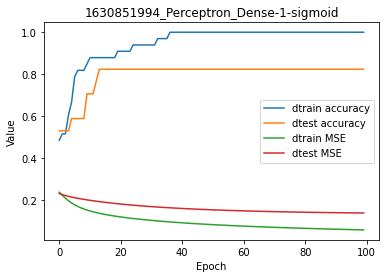

In [16]:
model.plot(path=False)

## Write, read & Predict

A trained model can be written on disk such as:

In [17]:
model.write()

# model.write(path=/your/custom/path)

Make: /media/synthase/beta/EpyNN/nnlive/dummy_boolean/models/1630851994_Perceptron_Dense-1-sigmoid.pickle


A model can be read from disk such as:

In [18]:
model = read_model()

# model = read_model(path=/your/custom/path)

We can retrieve new features and predict on them.

In [19]:
X_features, _ = prepare_dataset(N_SAMPLES=10)

dset = model.predict(X_features)

Results can be extracted such as:

In [20]:
for n, pred, probs, features in zip(dset.ids, dset.P, dset.A, dset.X):
    print(n, pred, probs, features)

0 [1.] [0.68043381] [ True False False ...  True  True  True]
1 [1.] [0.85747028] [ True  True  True ...  True False  True]
2 [1.] [0.59525098] [False  True False ...  True  True  True]
3 [1.] [0.92413633] [False  True  True ... False  True  True]
4 [0.] [0.09419323] [ True False  True ...  True False False]
5 [1.] [0.61585502] [False  True False ...  True  True  True]
6 [1.] [0.90922115] [False False  True ... False  True  True]
7 [1.] [0.82268849] [False False  True ... False  True False]
8 [1.] [0.86659777] [ True False  True ...  True  True  True]
9 [1.] [0.85425442] [ True  True  True ...  True  True  True]
